In [24]:

import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


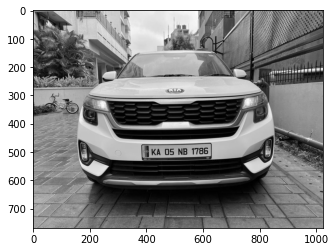

In [9]:
img = cv2.imread('C:\\Users\\ASUS\\Desktop\\Task-8--main\\Task-8--main\\car1.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

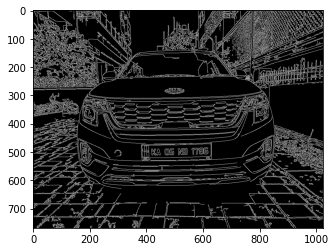

In [10]:
bfilter = cv2.bilateralFilter(img, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [11]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [12]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [13]:
location

array([[[628, 472]],

       [[389, 475]],

       [[386, 518]],

       [[626, 515]]], dtype=int32)

In [14]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

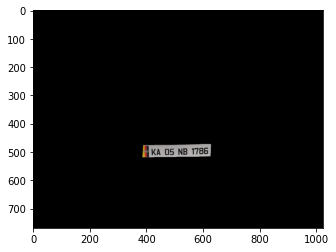

In [15]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [16]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

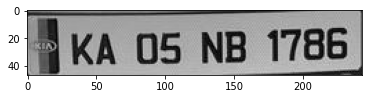

In [17]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [32]:
# reader = easyocr.Reader(["en"])
# result = reader.readtext(cropped_image)
# result

def text_extraction(image, lang_code='en'):
    reader = easyocr.Reader([lang_code], gpu=False)
    roi = cv2.imread(cropped_image)#[85:731, 265:1275]
    output = reader.readtext(roi)
    # it returns list of tuple with ([x,y coordinates],text,text_threshold)
    return output

In [34]:
text = output[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(cropped_image, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(cropped_image, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

NameError: name 'output' is not defined

In [21]:
print(text)

NameError: name 'text' is not defined